In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math


In [3]:
df_subscribers = pd.read_csv('Copy of subscribers.csv')

In [4]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [5]:
df_subscribers.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [6]:
df_subscribers_1 = pd.read_pickle(r"subscribers")

In [7]:
df_subscribers_1

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [8]:
cols_to_use = ["subid","creation_until_cancel_days","cancel_before_trial_end","revenue_net","paid_TF","refund_after_trial_TF"]
df_subscribers_all = pd.merge(df_subscribers, df_subscribers_1[cols_to_use],how='outer',on="subid")

In [9]:
df_subscribers_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 0 to 227627
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [10]:
df_cust_ser = pd.read_pickle(r"customer_service_reps")

In [11]:
df_cust_ser_groupby = df_cust_ser.groupby(['subid'],
                 as_index=False, sort=False).agg({
    'revenue_net_1month':'mean', 
    'renew':'sum'
})

df_cust_ser_groupby

,subid,revenue_net_1month,renew
0,25108574,1.1377,0
1,25914865,1.1377,0
2,28778936,1.1377,0
3,21481314,1.1377,0
4,24230000,1.1377,0
...,...,...,...
1369355,21965147,0.0000,0
1369356,21781165,3.8902,0
1369357,27625059,0.0000,0
1369358,27845350,3.5232,0


In [12]:
cols_to_use_other = ["subid","revenue_net_1month"]
df_subscribers_all_1 = pd.merge(df_subscribers_all,df_cust_ser_groupby[cols_to_use_other],how='outer',on="subid")

In [13]:
df_subscribers_all_1=df_subscribers_all_1[df_subscribers_all_1.country.notnull()]

In [14]:
df_engage = pd.read_pickle(r"engagement")

In [15]:
#group by id to calculate avg num for each engagement before merging 
df_engage_groupby = df_engage.groupby(['subid'],
                 as_index=False, sort=False).agg({
    'app_opens':'mean', 
    'num_videos_completed':'mean',
    'num_videos_more_than_30_seconds':'mean', 
    'num_videos_rated':'mean',
    'num_series_started':'mean', 
    'cust_service_mssgs':'mean',
})

df_engage_groupby

,subid,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,cust_service_mssgs
0,22349235,0.666667,0.000000,3.666667,0.000000,0.000000,0.666667
1,20848497,0.800000,3.100000,4.500000,0.000000,0.500000,0.400000
2,22680106,1.000000,0.500000,4.571429,0.000000,0.642857,0.142857
3,22478137,0.800000,3.000000,4.600000,0.000000,0.400000,0.400000
4,21899628,1.000000,4.833333,5.333333,0.000000,0.833333,0.500000
...,...,...,...,...,...,...,...
135014,29773608,1.000000,1.857143,4.000000,0.000000,0.571429,0.428571
135015,20699289,0.666667,0.666667,2.333333,0.000000,0.333333,0.666667
135016,27373263,1.857143,2.500000,4.714286,0.000000,0.428571,0.428571
135017,28409777,5.000000,3.883721,4.511628,0.046512,0.860465,0.395349


In [16]:
cols_to_use_engage = ["subid","app_opens","num_videos_completed","num_videos_more_than_30_seconds","num_videos_rated","num_series_started","cust_service_mssgs"]
df_subscribers_all_final = pd.merge(df_subscribers_all_1, df_engage_groupby[cols_to_use_engage],how='outer',on="subid")

In [17]:
df_subscribers_all_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 0 to 227627
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       227628 non-null  float64
 1   subid                            227628 non-null  int64  
 2   package_type                     192054 non-null  object 
 3   num_weekly_services_utilized     117178 non-null  float64
 4   preferred_genre                  191302 non-null  object 
 5   intended_use                     224079 non-null  object 
 6   weekly_consumption_hour          189698 non-null  float64
 7   num_ideal_streaming_services     115458 non-null  float64
 8   age                              192459 non-null  float64
 9   male_TF                          227359 non-null  object 
 10  country                          227628 non-null  object 
 11  attribution_technical            227628 non-null  object 
 12  at

In [18]:
df_subscribers_all_final.isnull().sum()

Unnamed: 0                              0
subid                                   0
package_type                        35574
num_weekly_services_utilized       110450
preferred_genre                     36326
intended_use                         3549
weekly_consumption_hour             37930
num_ideal_streaming_services       112170
age                                 35169
male_TF                               269
country                                 0
attribution_technical                   0
attribution_survey                   2644
op_sys                              13375
months_per_bill_period                  0
plan_type                               0
monthly_price                           0
discount_price                          0
account_creation_date                   0
trial_end_date                          0
initial_credit_card_declined            0
join_fee                            34904
language                                0
payment_type                      

# Customer segmentation

In [19]:
#drop attributes that not related to customer segmentation
df_subscribers_segment = df_subscribers_all_final.drop(["app_opens","num_videos_completed","num_videos_more_than_30_seconds","num_videos_rated","num_series_started","cust_service_mssgs","country","months_per_bill_period","trial_end_date","initial_credit_card_declined","language","last_payment","next_payment","payment_type","cancel_date","payment_period"],axis = 1)

In [20]:
df_subscribers_segment.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
attribution_technical                0
attribution_survey                2644
op_sys                           13375
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
join_fee                         34904
num_trial_days                       0
current_sub_TF                       0
trial_completed                      0
creation_until_cancel_days       75860
cancel_before_trial_end              0
revenue_net                      34904
paid_TF                              0
refund_after_trial_TF    

In [21]:
df_subscribers_segment["package_type"].fillna("No response", inplace=True)

In [22]:
df_subscribers_segment["num_weekly_services_utilized"].fillna(df_subscribers_segment["num_weekly_services_utilized"].mean(), inplace=True)

In [23]:
df_subscribers_segment["preferred_genre"].fillna("No response", inplace=True)

In [24]:
df_subscribers_segment["intended_use"].fillna("No response", inplace=True)

In [25]:
df_subscribers_segment["weekly_consumption_hour"].fillna(df_subscribers_segment["weekly_consumption_hour"].mean(), inplace=True)

In [26]:
df_subscribers_segment["num_ideal_streaming_services"].fillna(df_subscribers_segment["num_ideal_streaming_services"].mean(), inplace=True)

In [27]:
df_subscribers_segment["age"].fillna(df_subscribers_segment["age"].mean(), inplace=True)

In [28]:
df_subscribers_segment = df_subscribers_segment.dropna(subset=['male_TF'])

In [29]:
df_subscribers_segment["male_TF"].value_counts()

False    200902
True      26457
Name: male_TF, dtype: int64

In [30]:
df_subscribers_segment["attribution_survey"].fillna("No response", inplace=True)

In [31]:
df_subscribers_segment["op_sys"].fillna("No record", inplace=True)

In [32]:
df_subscribers_segment["join_fee"].fillna(df_subscribers_segment["join_fee"].mean(), inplace=True)

In [33]:
#how to fill null if has not cancelled?
df_subscribers_segment["creation_until_cancel_days"].fillna(999, inplace=True)

In [34]:
df_subscribers_segment["revenue_net"].fillna(df_subscribers_segment["revenue_net"].mean(), inplace=True)

In [35]:
df_subscribers_segment["revenue_net_1month"].fillna(df_subscribers_segment["revenue_net_1month"].mean(), inplace=True)

In [36]:
df_subscribers_segment.isnull().sum()

Unnamed: 0                      0
subid                           0
package_type                    0
num_weekly_services_utilized    0
preferred_genre                 0
intended_use                    0
weekly_consumption_hour         0
num_ideal_streaming_services    0
age                             0
male_TF                         0
attribution_technical           0
attribution_survey              0
op_sys                          0
plan_type                       0
monthly_price                   0
discount_price                  0
account_creation_date           0
join_fee                        0
num_trial_days                  0
current_sub_TF                  0
trial_completed                 0
creation_until_cancel_days      0
cancel_before_trial_end         0
revenue_net                     0
paid_TF                         0
refund_after_trial_TF           0
revenue_net_1month              0
dtype: int64

In [37]:
df_subscribers_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227359 entries, 0 to 227627
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227359 non-null  float64
 1   subid                         227359 non-null  int64  
 2   package_type                  227359 non-null  object 
 3   num_weekly_services_utilized  227359 non-null  float64
 4   preferred_genre               227359 non-null  object 
 5   intended_use                  227359 non-null  object 
 6   weekly_consumption_hour       227359 non-null  float64
 7   num_ideal_streaming_services  227359 non-null  float64
 8   age                           227359 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  attribution_technical         227359 non-null  object 
 11  attribution_survey            227359 non-null  object 
 12  op_sys                        227359 non-nul

# Normalize

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [39]:
seg_numeric_features = list(df_subscribers_segment.columns[df_subscribers_segment.dtypes != object])

In [40]:
seg_numeric_features

['Unnamed: 0',
 'subid',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'monthly_price',
 'discount_price',
 'join_fee',
 'num_trial_days',
 'creation_until_cancel_days',
 'revenue_net',
 'revenue_net_1month']

In [41]:
df_subscribers_segment_numeric=df_subscribers_segment[['Unnamed: 0',
 'subid',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'monthly_price',
 'discount_price',
 'join_fee',
 'num_trial_days',
 'creation_until_cancel_days',
 'revenue_net',
 'revenue_net_1month']]

In [42]:
#deal with unreasonable numerial values
df_subscribers_segment_numeric.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,join_fee,num_trial_days,creation_until_cancel_days,revenue_net,revenue_net_1month
count,227359.000000,2.273590e+05,227359.000000,227359.000000,227359.000000,2.273590e+05,227359.000000,227359.000000,227359.000000,227359.000000,227359.000000,227359.000000,227359.000000
mean,341116.909280,2.498602e+07,3.008824,27.997752,2.061260,7.579879e+02,4.732047,4.512186,0.115273,13.989532,343.937306,1.556581,1.758827
std,197159.807893,2.885669e+06,0.589058,4.545504,0.175237,1.766690e+05,0.101109,0.097135,0.162875,0.382679,464.005333,2.823559,1.703664
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,0.807400,0.770700,-0.660600,0.000000,-108.000000,-5.982100,-5.578400
25%,170573.000000,2.248958e+07,3.000000,25.851492,2.000000,3.700000e+01,4.734300,4.514100,0.036700,14.000000,5.000000,0.000000,0.000000
50%,341114.000000,2.496973e+07,3.008824,27.997724,2.061260,5.000000e+01,4.734300,4.514100,0.036700,14.000000,13.000000,0.000000,1.758827
75%,511899.500000,2.749019e+07,3.008824,30.201361,2.061260,6.400000e+01,4.734300,4.514100,0.115273,14.000000,999.000000,1.556581,1.758827
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,5.101300,5.027900,0.734000,14.000000,999.000000,15.634200,5.468300


In [43]:
df_subscribers_segment=df_subscribers_segment[(df_subscribers_segment.weekly_consumption_hour >= 0)]

In [44]:
df_subscribers_segment = df_subscribers_segment[(df_subscribers_segment.age < 100) & (df_subscribers_segment.age >= 0)]

In [45]:
df_subscribers_segment = df_subscribers_segment[(df_subscribers_segment.join_fee >= 0)]

In [46]:
# display categorical variables
seg_categorical_features = list(df_subscribers_segment.columns[df_subscribers_segment.dtypes == object])

In [47]:
seg_categorical_features

['package_type',
 'preferred_genre',
 'intended_use',
 'male_TF',
 'attribution_technical',
 'attribution_survey',
 'op_sys',
 'plan_type',
 'account_creation_date',
 'current_sub_TF',
 'trial_completed',
 'cancel_before_trial_end',
 'paid_TF',
 'refund_after_trial_TF']

In [48]:
df_categorica_dummy = pd.get_dummies(df_subscribers_segment, columns = ['package_type',
 'preferred_genre',
 'intended_use',
 'attribution_technical',
 'attribution_survey',
 'op_sys',
 'plan_type',
                                                                       'male_TF',
 'current_sub_TF',
 'trial_completed',
 'cancel_before_trial_end',
 'paid_TF',
 'refund_after_trial_TF'])

In [49]:
df_categorica_dummy.columns

Index(['Unnamed: 0', 'subid', 'num_weekly_services_utilized',
       'weekly_consumption_hour', 'num_ideal_streaming_services', 'age',
       'monthly_price', 'discount_price', 'account_creation_date', 'join_fee',
       ...
       'current_sub_TF_False', 'current_sub_TF_True', 'trial_completed_False',
       'trial_completed_True', 'cancel_before_trial_end_False',
       'cancel_before_trial_end_True', 'paid_TF_False', 'paid_TF_True',
       'refund_after_trial_TF_False', 'refund_after_trial_TF_True'],
      dtype='object', length=108)

In [50]:
df_categorica_dummy.head()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,account_creation_date,join_fee,...,current_sub_TF_False,current_sub_TF_True,trial_completed_False,trial_completed_True,cancel_before_trial_end_False,cancel_before_trial_end_True,paid_TF_False,paid_TF_True,refund_after_trial_TF_False,refund_after_trial_TF_True
1,380374.0,23383224,3.008824,22.951579,2.06126,70.0,4.7343,4.5141,3/1/2020 15:44,0.3303,...,0,1,0,1,1,0,1,0,1,0
2,496617.0,26844789,3.000000,36.001186,2.00000,25.0,4.7343,4.5141,12/7/2019 16:37,0.1101,...,1,0,0,1,1,0,1,0,1,0
3,356799.0,29417030,3.008824,20.051667,2.06126,30.0,4.7343,4.5141,1/27/2020 16:09,0.0367,...,1,0,0,1,1,0,1,0,1,0
4,681701.0,26723159,4.000000,22.951579,3.00000,28.0,4.7343,4.5141,10/5/2019 12:57,0.0367,...,0,1,0,1,1,0,1,0,1,0
5,284782.0,24810928,3.008824,20.051667,2.06126,70.0,4.7343,4.5141,3/3/2020 20:15,0.3303,...,0,1,0,1,0,1,0,1,0,1


In [51]:
df_categorica_dummy=df_categorica_dummy.drop(["Unnamed: 0",'subid','account_creation_date'],axis = 1)

In [52]:
scaler = MinMaxScaler()
col_name = list(df_categorica_dummy.columns.values.tolist())
df_new_dummy = pd.DataFrame(scaler.fit_transform(df_categorica_dummy), columns = col_name)

In [53]:
df_new_dummy=df_new_dummy.fillna(0)

# K-means

In [54]:

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_new_dummy) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-1.095867,-0.493768
1,-0.378684,0.836785
2,-0.404749,0.685184
3,-0.926263,-0.491716
4,0.870619,-1.513248


In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X_principal)

KMeans(n_clusters=3, random_state=0)

In [56]:
kmeans.cluster_centers_

array([[-0.2990239 ,  1.01077704],
       [-0.84958979, -0.48948933],
       [ 1.40574032, -0.41583785]])

In [57]:
kmeans.inertia_

88271.3870486317

# Using Elbow to find best value

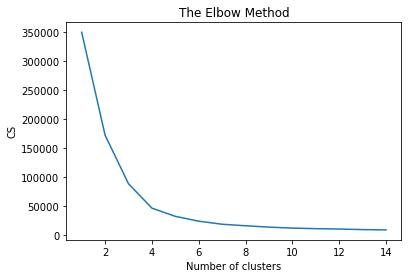

In [58]:
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_principal)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [59]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(X_principal)
print(silhouette_score(X_principal, kmeans.labels_, metric='euclidean'))

0.6249196229166737


In [60]:
label = kmeans.labels_
center = kmeans.cluster_centers_
print(label)

[0 2 2 ... 3 0 2]


In [61]:
df_categorica_dummy["labels"]=label

In [62]:
df_categorica_dummy.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,join_fee,num_trial_days,creation_until_cancel_days,revenue_net,...,current_sub_TF_True,trial_completed_False,trial_completed_True,cancel_before_trial_end_False,cancel_before_trial_end_True,paid_TF_False,paid_TF_True,refund_after_trial_TF_False,refund_after_trial_TF_True,labels
1,3.008824,22.951579,2.06126,70.0,4.7343,4.5141,0.3303,14.0,0.0,0.0,...,1,0,1,1,0,1,0,1,0,0
2,3.000000,36.001186,2.00000,25.0,4.7343,4.5141,0.1101,14.0,1.0,0.0,...,0,0,1,1,0,1,0,1,0,2
3,3.008824,20.051667,2.06126,30.0,4.7343,4.5141,0.0367,14.0,0.0,0.0,...,0,0,1,1,0,1,0,1,0,2
4,4.000000,22.951579,3.00000,28.0,4.7343,4.5141,0.0367,14.0,9.0,0.0,...,1,0,1,1,0,1,0,1,0,0
5,3.008824,20.051667,2.06126,70.0,4.7343,4.5141,0.3303,14.0,71.0,0.0,...,1,0,1,0,1,0,1,0,1,3


# Visualization

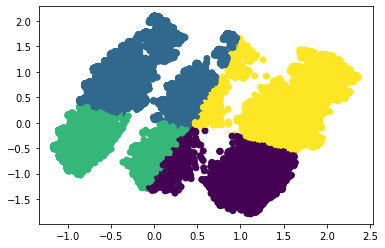

In [63]:
plt.scatter(X_principal['P1'], X_principal['P2'],   
           c = KMeans(n_clusters = 4).fit_predict(X_principal)) 
plt.show() 

In [64]:
avg_df = df_categorica_dummy.groupby(['labels'], as_index=False).mean()
avg_df

,labels,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,join_fee,num_trial_days,creation_until_cancel_days,...,current_sub_TF_False,current_sub_TF_True,trial_completed_False,trial_completed_True,cancel_before_trial_end_False,cancel_before_trial_end_True,paid_TF_False,paid_TF_True,refund_after_trial_TF_False,refund_after_trial_TF_True
0,0,3.085966,28.069979,2.072966,42.850385,4.734816,4.514831,0.122708,14.000000,8.465848,...,0.018770,0.981230,0.005928,0.994072,0.929259,0.070741,1.000000,0.000000,1.000000,0.000000
1,1,2.922248,28.027616,2.045631,49.998416,4.717594,4.498467,0.097781,13.934112,782.065460,...,0.911469,0.088531,0.258680,0.741320,0.000000,1.000000,0.038374,0.961626,0.896265,0.103735
2,2,2.885906,27.310305,2.046440,48.282052,4.733207,4.513305,0.092383,13.993849,8.127719,...,0.950335,0.049665,0.266776,0.733224,0.938050,0.061950,1.000000,0.000000,1.000000,0.000000
3,3,3.157264,29.254351,2.078466,46.133104,4.735198,4.515382,0.161955,14.000000,759.157331,...,0.026798,0.973202,0.008472,0.991528,0.000000,1.000000,0.049965,0.950035,0.849447,0.150553


In [65]:
list(avg_df.columns)

['labels',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'monthly_price',
 'discount_price',
 'join_fee',
 'num_trial_days',
 'creation_until_cancel_days',
 'revenue_net',
 'revenue_net_1month',
 'package_type_No response',
 'package_type_base',
 'package_type_economy',
 'package_type_enhanced',
 'preferred_genre_No response',
 'preferred_genre_comedy',
 'preferred_genre_drama',
 'preferred_genre_international',
 'preferred_genre_other',
 'preferred_genre_regional',
 'intended_use_No response',
 'intended_use_access to exclusive content',
 'intended_use_education',
 'intended_use_expand international access',
 'intended_use_expand regional access',
 'intended_use_other',
 'intended_use_replace OTT',
 'intended_use_supplement OTT',
 'attribution_technical_affiliate',
 'attribution_technical_appstore',
 'attribution_technical_bing',
 'attribution_technical_bing_organic',
 'attribution_technical_brand sem intent bing',
 'attribution

In [66]:
label_0=df_categorica_dummy[df_categorica_dummy["labels"]==0]
label_1=df_categorica_dummy[df_categorica_dummy["labels"]==1]
label_2=df_categorica_dummy[df_categorica_dummy["labels"]==2]
label_3=df_categorica_dummy[df_categorica_dummy["labels"]==3]

In [67]:
label_0.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,join_fee,num_trial_days,creation_until_cancel_days,revenue_net,...,current_sub_TF_True,trial_completed_False,trial_completed_True,cancel_before_trial_end_False,cancel_before_trial_end_True,paid_TF_False,paid_TF_True,refund_after_trial_TF_False,refund_after_trial_TF_True,labels
1,3.008824,22.951579,2.06126,70.0,4.7343,4.5141,0.3303,14.0,0.0,0.0,...,1,0,1,1,0,1,0,1,0,0
4,4.000000,22.951579,3.00000,28.0,4.7343,4.5141,0.0367,14.0,9.0,0.0,...,1,0,1,1,0,1,0,1,0,0
8,3.008824,25.851492,2.06126,73.0,4.7343,4.5141,0.6606,14.0,1.0,0.0,...,1,0,1,1,0,1,0,1,0,0
11,3.008824,37.451142,2.06126,24.0,4.7343,4.5141,0.3303,14.0,6.0,0.0,...,1,0,1,1,0,1,0,1,0,0
16,3.008824,27.301448,2.06126,26.0,4.7343,4.5141,0.0367,14.0,0.0,0.0,...,1,0,1,1,0,1,0,1,0,0


<AxesSubplot:xlabel='labels'>

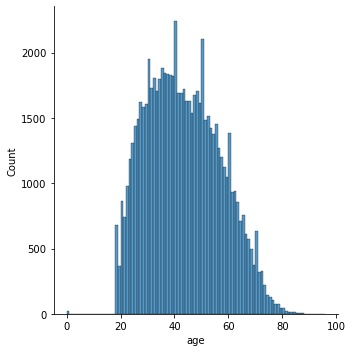

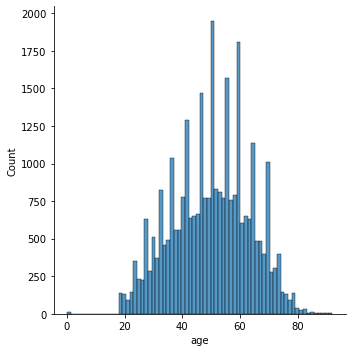

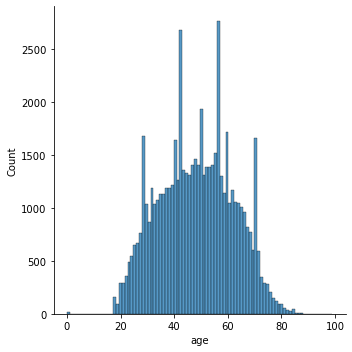

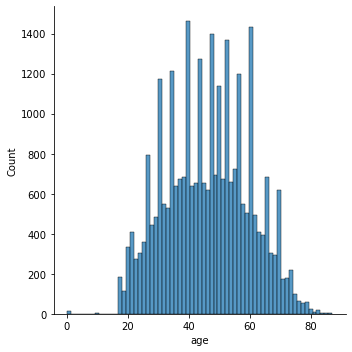

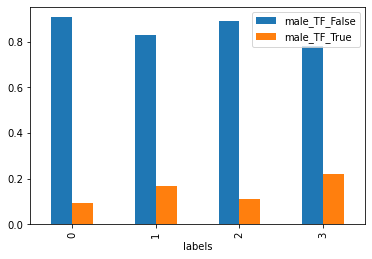

In [68]:
import seaborn as sns 
#demographics: age, gender
sns.displot(data=label_0,x="age")
sns.displot(data=label_1,x="age")
sns.displot(data=label_2,x="age")
sns.displot(data=label_3,x="age")
avg_df.plot(x='labels',y=[ 'male_TF_False',
 'male_TF_True'],kind="bar")
#all four groups have mean around 42-49. 

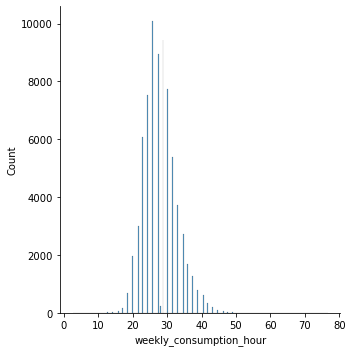

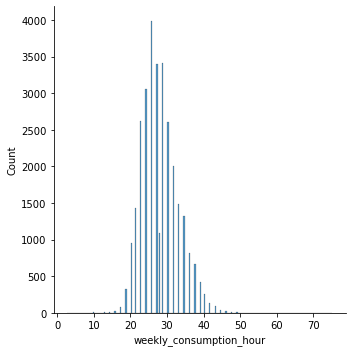

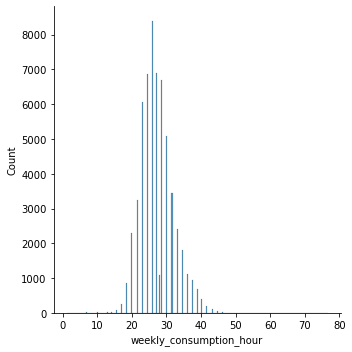

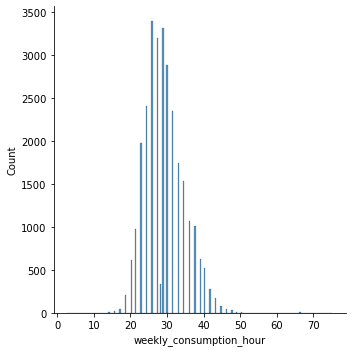

In [69]:
#behaviovial
sns.displot(data=label_0,x='weekly_consumption_hour')
sns.displot(data=label_1,x='weekly_consumption_hour')
sns.displot(data=label_2,x='weekly_consumption_hour')
sns.displot(data=label_3,x='weekly_consumption_hour')
#all are distributed between 20-40

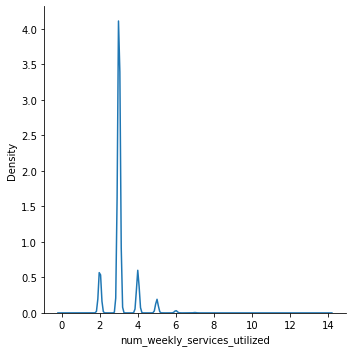

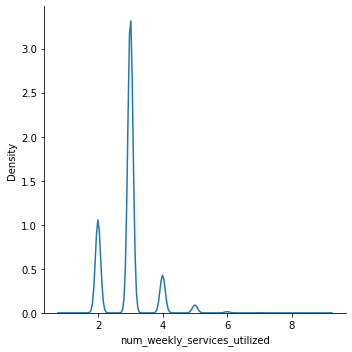

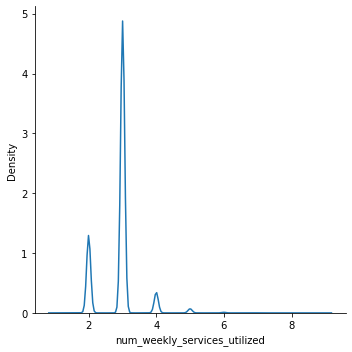

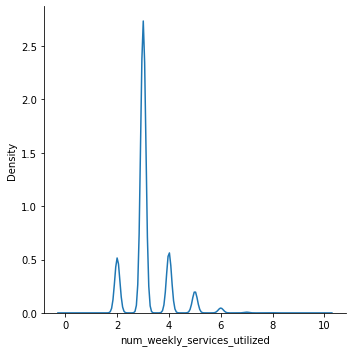

In [70]:
sns.displot(data=label_0,x='num_weekly_services_utilized',kind='kde')
sns.displot(data=label_1,x='num_weekly_services_utilized',kind='kde')
sns.displot(data=label_2,x='num_weekly_services_utilized',kind='kde')
sns.displot(data=label_3,x='num_weekly_services_utilized',kind='kde')
##all are distributed between 2-4, with most at 3 services

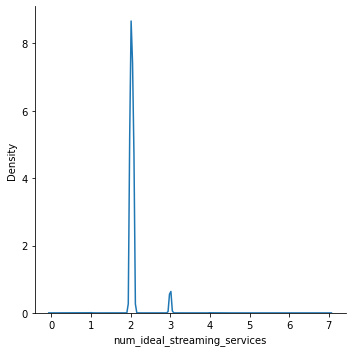

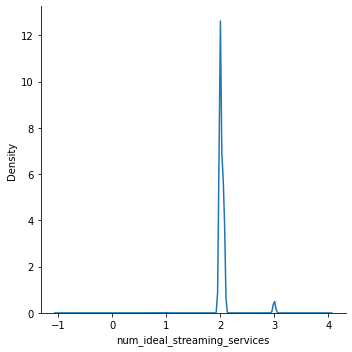

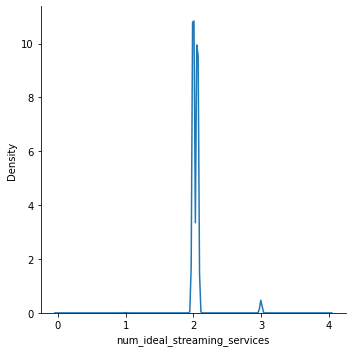

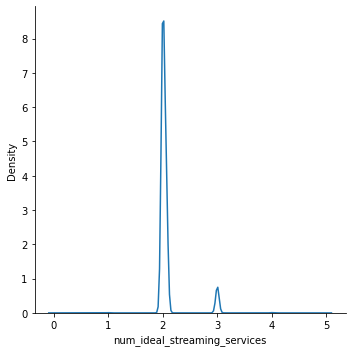

In [71]:
sns.displot(data=label_0,x='num_ideal_streaming_services',kind='kde')
sns.displot(data=label_1,x='num_ideal_streaming_services',kind='kde')
sns.displot(data=label_2,x='num_ideal_streaming_services',kind='kde')
sns.displot(data=label_3,x='num_ideal_streaming_services',kind='kde')
##all are distributed between 2-3, with most at 2 services

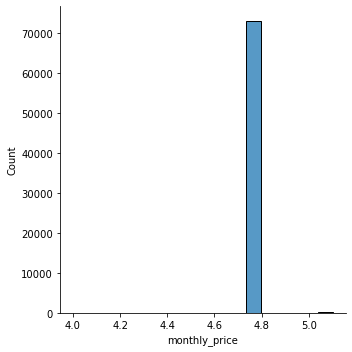

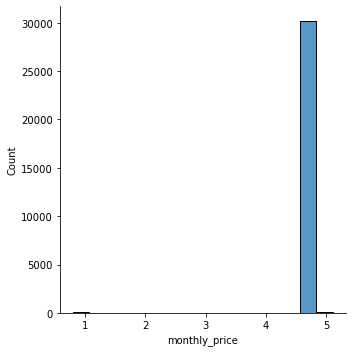

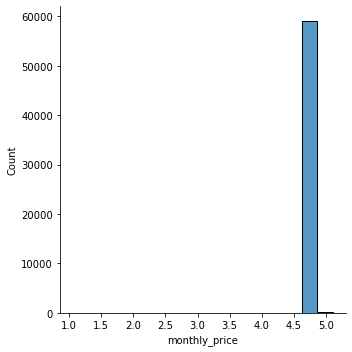

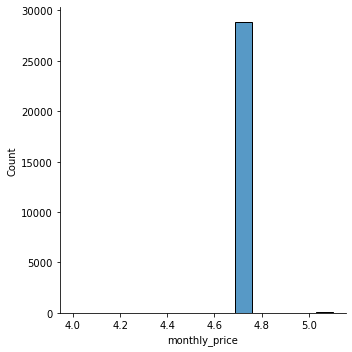

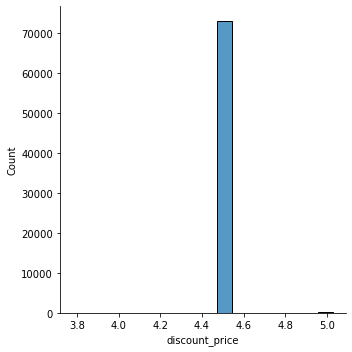

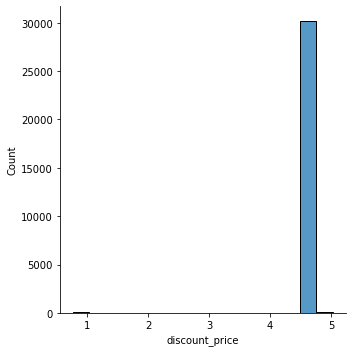

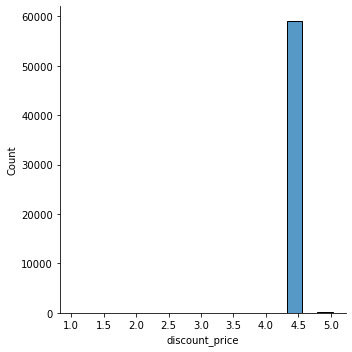

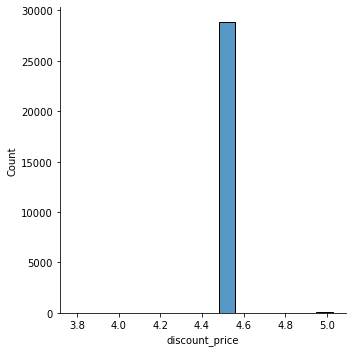

In [72]:
#price
sns.displot(data=label_0,x='monthly_price')
sns.displot(data=label_1,x='monthly_price')
sns.displot(data=label_2,x='monthly_price')
sns.displot(data=label_3,x='monthly_price')
sns.displot(data=label_0,x='discount_price')
sns.displot(data=label_1,x='discount_price')
sns.displot(data=label_2,x='discount_price')
sns.displot(data=label_3,x='discount_price')
#discount price is at the same trend

<AxesSubplot:xlabel='labels'>

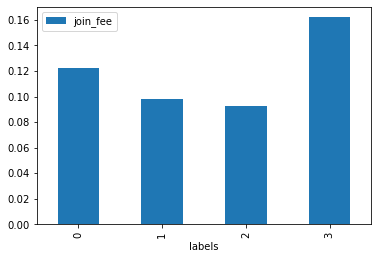

In [73]:
avg_df.plot(x="labels", y=['join_fee'], kind="bar")
#4>1>2>3

<AxesSubplot:xlabel='labels'>

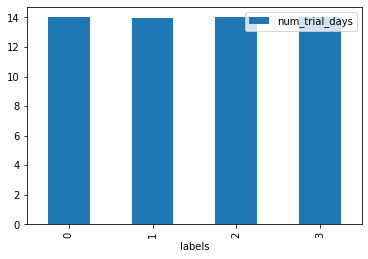

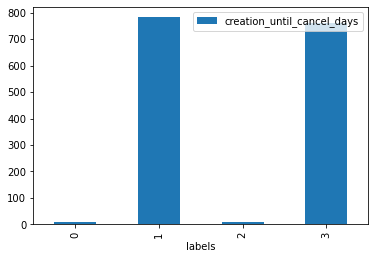

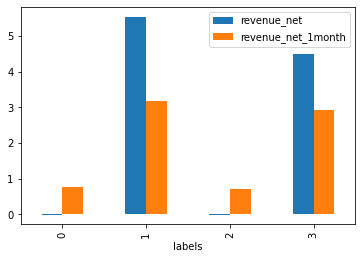

In [74]:
avg_df.plot(x="labels", y=['num_trial_days'], kind="bar")
avg_df.plot(x="labels", y=["creation_until_cancel_days"], kind="bar")
avg_df.plot(x="labels", y=['revenue_net',"revenue_net_1month"], kind="bar")
#num_trial days no difference
#group 2 and 4have longer days before cancelled,  and have larger revenue.

<AxesSubplot:xlabel='labels'>

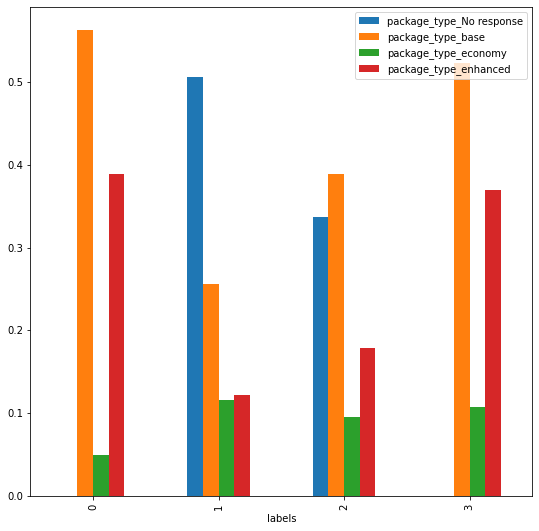

In [75]:
avg_df.plot(x="labels", y=['package_type_No response',
 'package_type_base',
 'package_type_economy',
 'package_type_enhanced'], kind="bar",figsize=(9, 9))
#base and enhanced are popular among four groups

<AxesSubplot:xlabel='labels'>

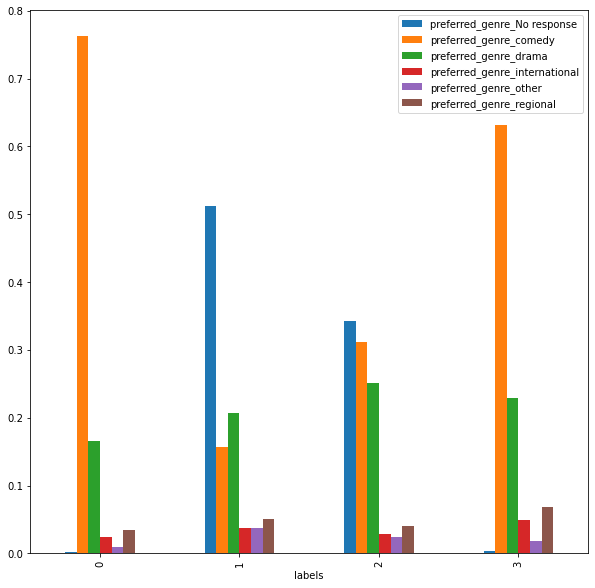

In [76]:
avg_df.plot(x="labels", y=[ 'preferred_genre_No response',
 'preferred_genre_comedy',
 'preferred_genre_drama',
 'preferred_genre_international',
 'preferred_genre_other',
 'preferred_genre_regional'], kind="bar",figsize=(10, 10))
#comdedy and drama are most popular, 

<AxesSubplot:xlabel='labels'>

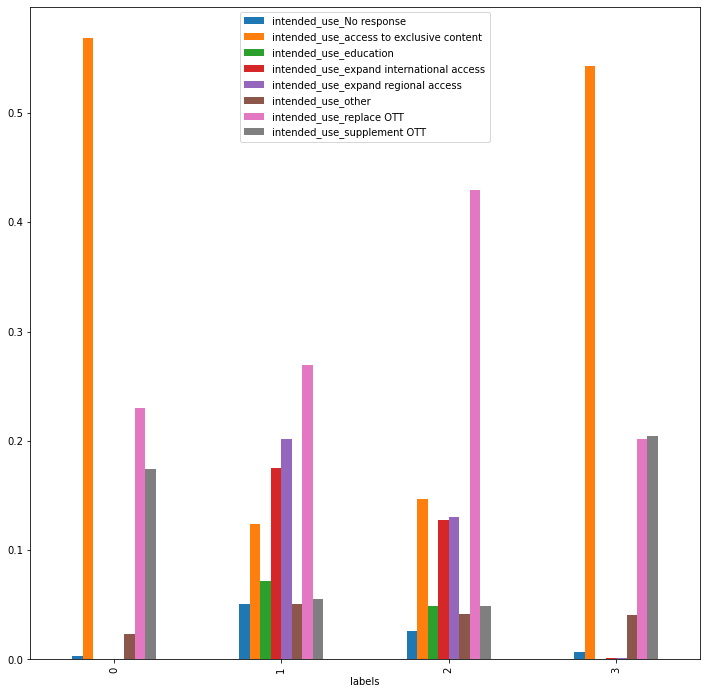

In [77]:

 avg_df.plot(x="labels", y=[ 'intended_use_No response',
 'intended_use_access to exclusive content',
 'intended_use_education',
 'intended_use_expand international access',
 'intended_use_expand regional access',
 'intended_use_other',
 'intended_use_replace OTT',
 'intended_use_supplement OTT'], kind="bar",figsize=(12, 12))
#group 1:raplace OTT, expand regional and international access,; group 2: access to exclusive content, replace ott, supplement OTT
#group 3: access to exclusive content, replace ott, supplement OTT; group 4:raplace OTT,access to exclusive content,expand regional access

<AxesSubplot:xlabel='labels'>

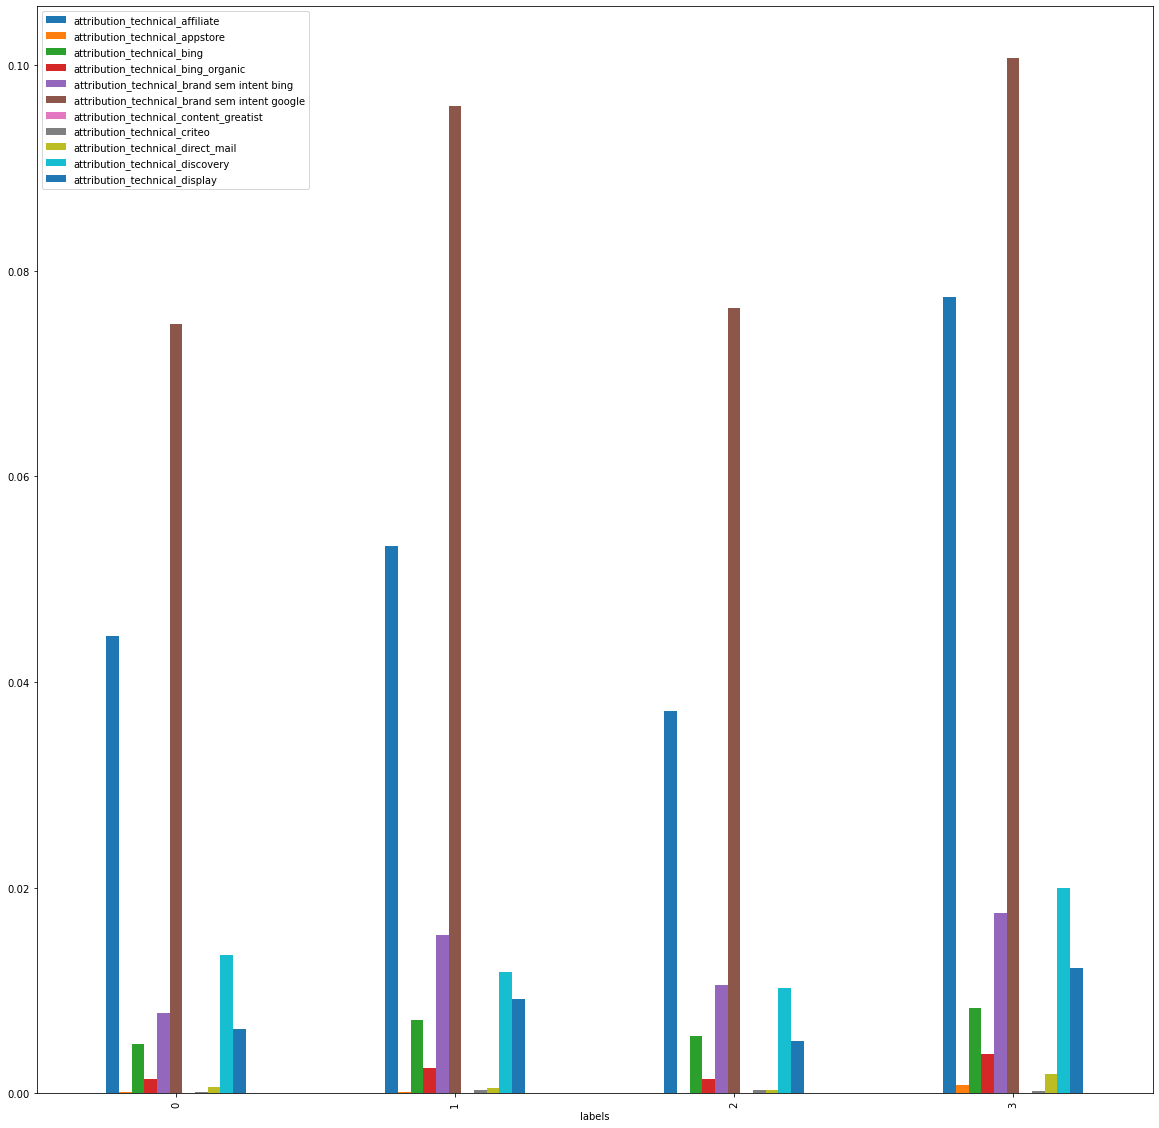

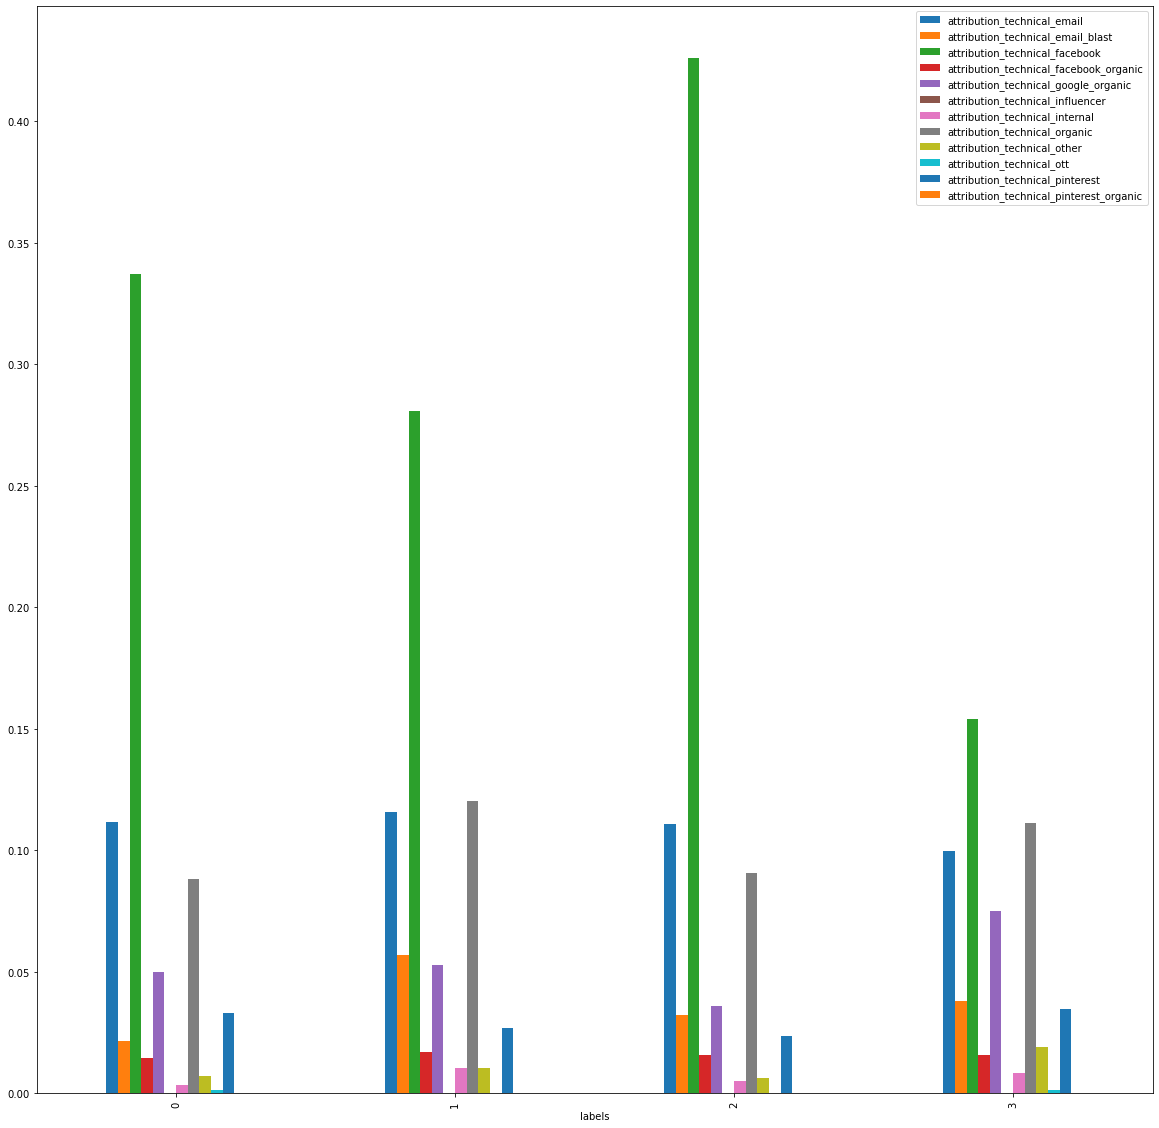

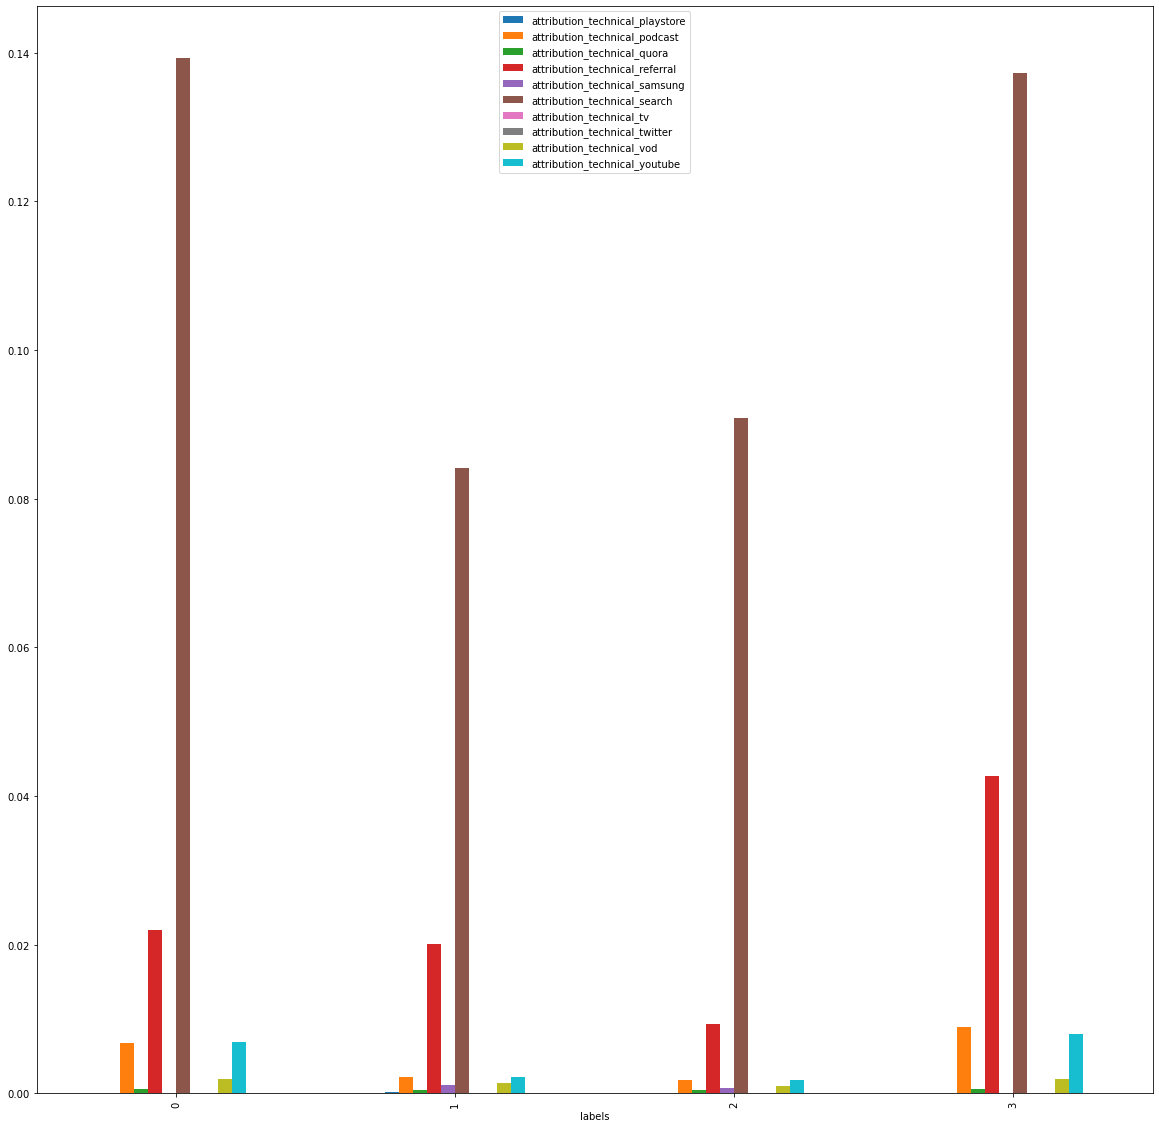

In [78]:

 avg_df.plot(x="labels", y=[  'attribution_technical_affiliate',
 'attribution_technical_appstore',
 'attribution_technical_bing',
 'attribution_technical_bing_organic',
 'attribution_technical_brand sem intent bing',
 'attribution_technical_brand sem intent google',
 'attribution_technical_content_greatist',
 'attribution_technical_criteo',
 'attribution_technical_direct_mail',
 'attribution_technical_discovery',
 'attribution_technical_display'], kind="bar",figsize=(20, 20))

 avg_df.plot(x="labels", y=['attribution_technical_email',
 'attribution_technical_email_blast',
 'attribution_technical_facebook',
 'attribution_technical_facebook_organic',
 'attribution_technical_google_organic',
 'attribution_technical_influencer',
 'attribution_technical_internal',
 'attribution_technical_organic',
 'attribution_technical_other',
 'attribution_technical_ott',
 'attribution_technical_pinterest',
 'attribution_technical_pinterest_organic'], kind="bar",figsize=(20, 20))

 avg_df.plot(x="labels", y=[
 'attribution_technical_playstore',
 'attribution_technical_podcast',
 'attribution_technical_quora',
 'attribution_technical_referral',
 'attribution_technical_samsung',
 'attribution_technical_search',
 'attribution_technical_tv',
 'attribution_technical_twitter',
 'attribution_technical_vod',
 'attribution_technical_youtube'], kind="bar",figsize=(20, 20))
#facebook is the highest, then pinterest,organic, search, brand sem intent google, display
#all group has similar distribution

<AxesSubplot:xlabel='labels'>

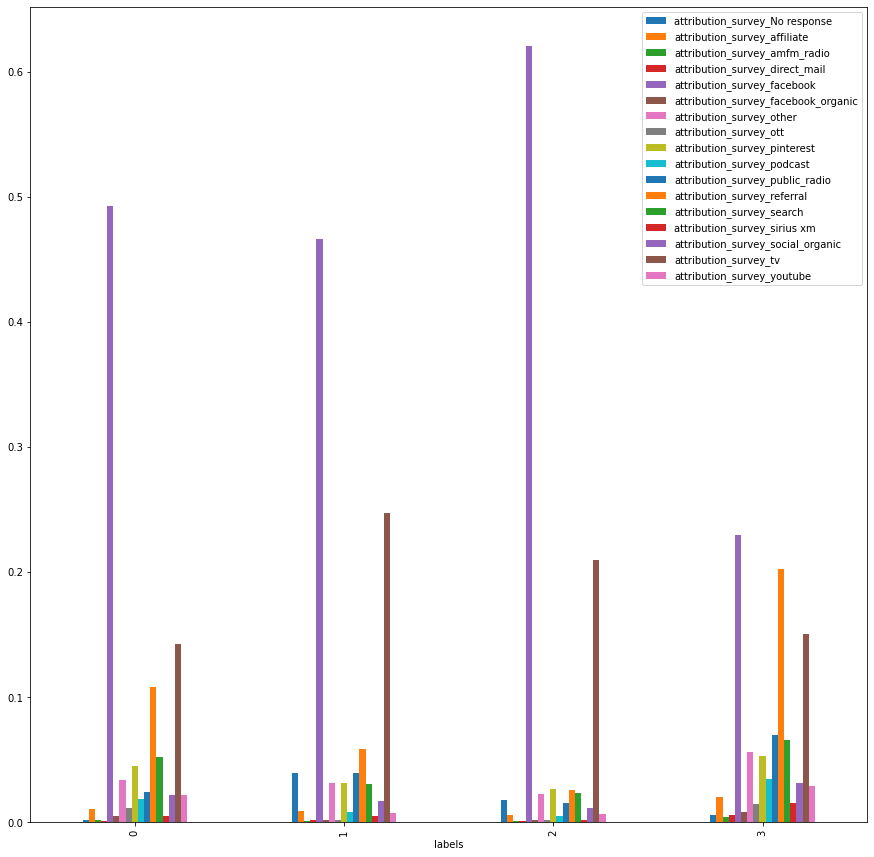

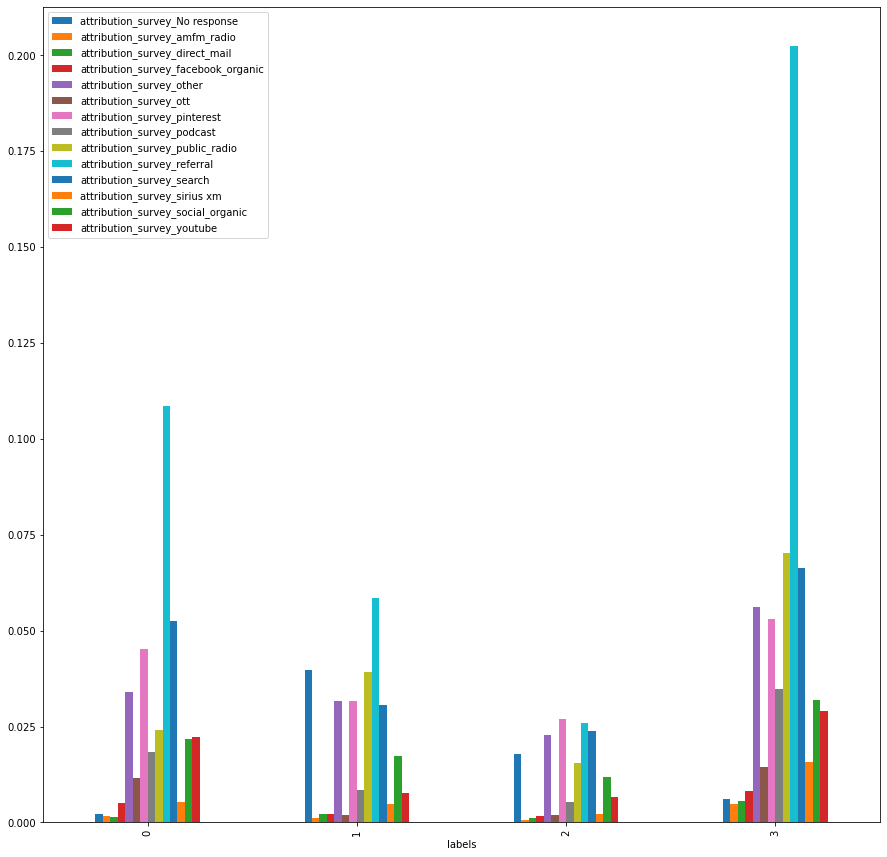

In [79]:

  avg_df.plot(x="labels", y=[ 'attribution_survey_No response',
 'attribution_survey_affiliate',
 'attribution_survey_amfm_radio',
 'attribution_survey_direct_mail',
 'attribution_survey_facebook',
 'attribution_survey_facebook_organic',
 'attribution_survey_other',
 'attribution_survey_ott',
 'attribution_survey_pinterest',
 'attribution_survey_podcast',
 'attribution_survey_public_radio',
 'attribution_survey_referral',
 'attribution_survey_search',
 'attribution_survey_sirius xm',
 'attribution_survey_social_organic',
 'attribution_survey_tv',
 'attribution_survey_youtube'], kind="bar",figsize=(15, 15))
 # exclude top 3: facebook, affiliate, tv to see the result   
avg_df.plot(x="labels", y=[ 'attribution_survey_No response',
 'attribution_survey_amfm_radio',
 'attribution_survey_direct_mail',
 'attribution_survey_facebook_organic',
 'attribution_survey_other',
 'attribution_survey_ott',
 'attribution_survey_pinterest',
 'attribution_survey_podcast',
 'attribution_survey_public_radio',
 'attribution_survey_referral',
 'attribution_survey_search',
 'attribution_survey_sirius xm',
 'attribution_survey_social_organic',
 'attribution_survey_youtube'], kind="bar",figsize=(15, 15))
#top 3: facebook, affiliate, tv 
#group 1: referal,public radio; group 2 referal, search; group 3 referal,public radio,search; group 4 pinterst, referal

<AxesSubplot:xlabel='labels'>

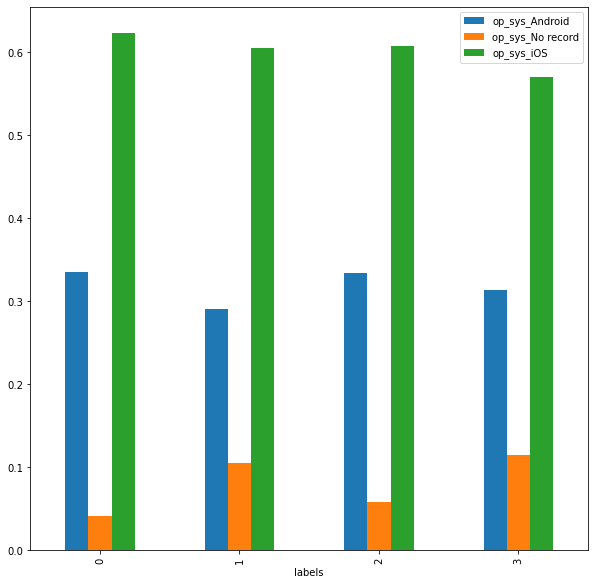

In [80]:

 avg_df.plot(x="labels", y=['op_sys_Android',
 'op_sys_No record',
 'op_sys_iOS'], kind="bar",figsize=(10, 10))
#all ios > android;

<AxesSubplot:xlabel='labels'>

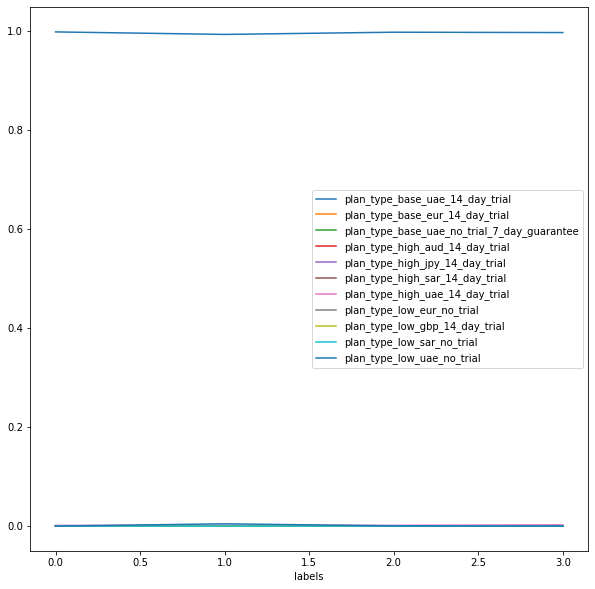

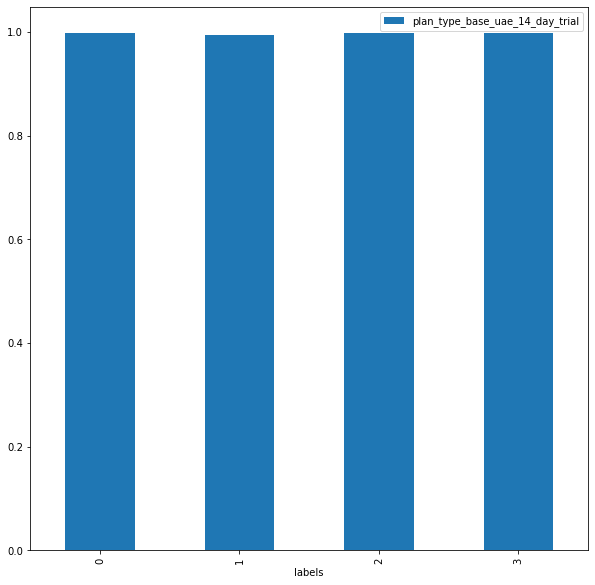

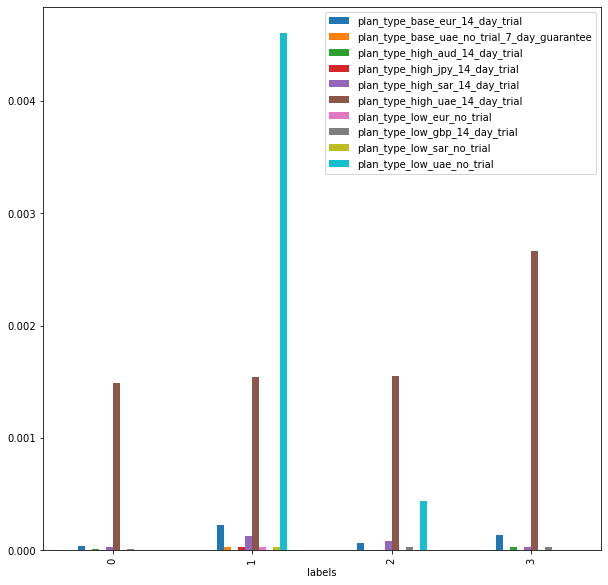

In [81]:
avg_df.plot(x="labels", y=['plan_type_base_uae_14_day_trial','plan_type_base_eur_14_day_trial',
 'plan_type_base_uae_no_trial_7_day_guarantee',
 'plan_type_high_aud_14_day_trial',
 'plan_type_high_jpy_14_day_trial',
 'plan_type_high_sar_14_day_trial',
 'plan_type_high_uae_14_day_trial',
 'plan_type_low_eur_no_trial',
 'plan_type_low_gbp_14_day_trial',
 'plan_type_low_sar_no_trial',
 'plan_type_low_uae_no_trial'], kind="line",figsize=(10, 10))
avg_df.plot(x="labels", y=['plan_type_base_uae_14_day_trial'], kind="bar",figsize=(10, 10))
avg_df.plot(x="labels", y=['plan_type_base_eur_14_day_trial',
 'plan_type_base_uae_no_trial_7_day_guarantee',
 'plan_type_high_aud_14_day_trial',
 'plan_type_high_jpy_14_day_trial',
 'plan_type_high_sar_14_day_trial',
 'plan_type_high_uae_14_day_trial',
 'plan_type_low_eur_no_trial',
 'plan_type_low_gbp_14_day_trial',
 'plan_type_low_sar_no_trial',
 'plan_type_low_uae_no_trial'], kind="bar",figsize=(10, 10))
#plan_type_base_uae_14_day_trial is highest among all;
#group 1 plan_type_low_uae_no_trial;group 2&3&4 plan_type_high_uae_14_day_trial;

<AxesSubplot:xlabel='labels'>

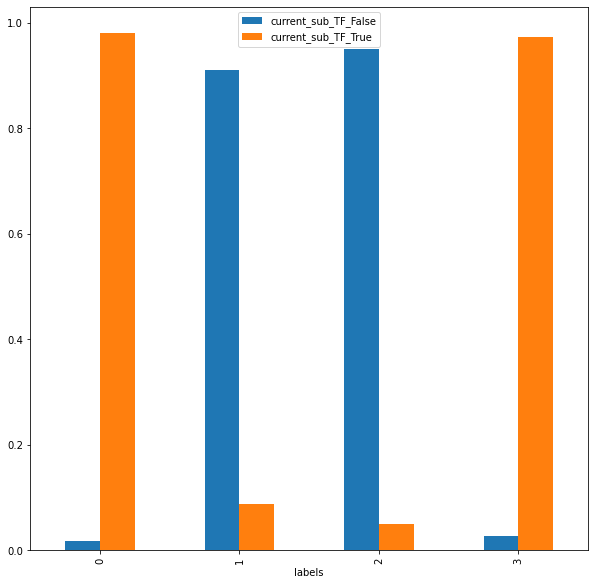

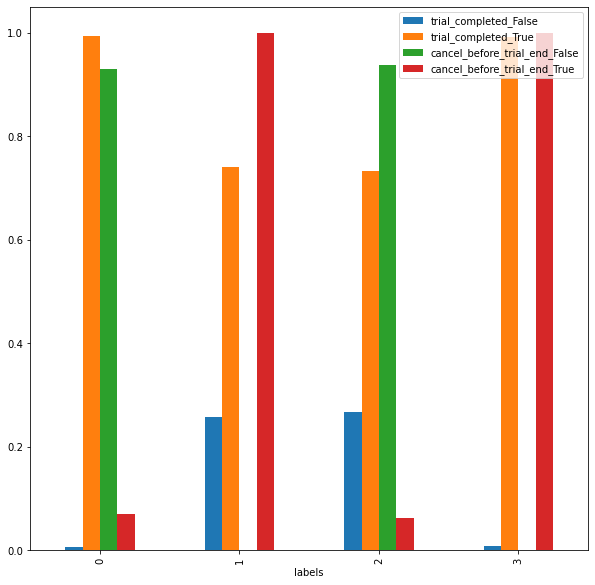

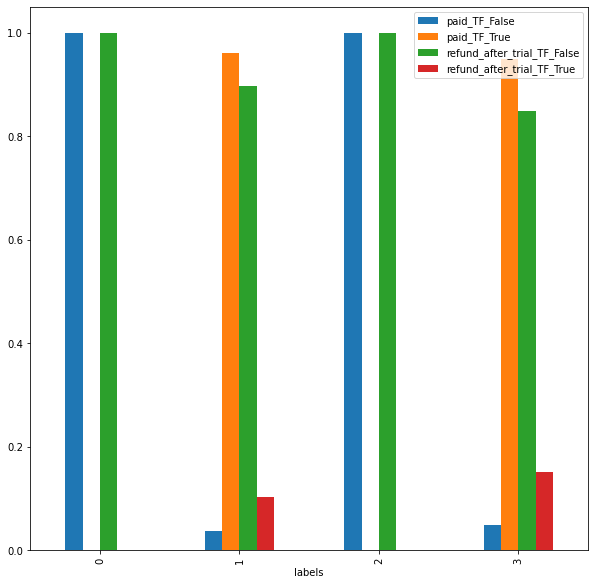

In [82]:
avg_df.plot(x="labels", y=['current_sub_TF_False',
 'current_sub_TF_True'], kind="bar",figsize=(10, 10))
avg_df.plot(x="labels", y=[
 'trial_completed_False',
 'trial_completed_True',
 'cancel_before_trial_end_False',
 'cancel_before_trial_end_True'], kind="bar",figsize=(10, 10))
avg_df.plot(x="labels", y=[
 'paid_TF_False',
 'paid_TF_True',
 'refund_after_trial_TF_False',
 'refund_after_trial_TF_True'], kind="bar",figsize=(10, 10))
#group 1&4 not sub; group 2-3 sub
#most of all completed trial, 2&4 did not cancel before end; 1&3 cancelled before end
#2&4 did not make a successful payment, 1&3 successful 
#all did not request refund after trial

# Attribution

In [83]:
import datetime
df_allocation = pd.DataFrame()
df_allocation['subid'] = df_subscribers_all_final.subid.copy()
df_allocation['account_creation_date'] = df_subscribers_all_final.account_creation_date.apply(lambda x:pd.to_datetime(x)).copy()
df_allocation['account_creation_month']= df_allocation['account_creation_date'].dt.year.apply(lambda x:str(x)) + df_allocation['account_creation_date'].dt.month.apply(lambda x:str(x))
df_allocation['attribution_survey'] = df_subscribers_all_final.attribution_survey.copy()
df_allocation['attribution_technical'] = df_subscribers_all_final.attribution_technical.copy()



In [84]:
df_allocation.head()

,subid,account_creation_date,account_creation_month,attribution_survey,attribution_technical
0,21724479,2020-01-24 21:44:00,20201,facebook,facebook
1,23383224,2020-03-01 15:44:00,20203,facebook,facebook
2,26844789,2019-12-07 16:37:00,201912,facebook,organic
3,29417030,2020-01-27 16:09:00,20201,tv,search
4,26723159,2019-10-05 12:57:00,201910,youtube,discovery


In [85]:
df_allocation.isnull().sum()

subid                        0
account_creation_date        0
account_creation_month       0
attribution_survey        2644
attribution_technical        0
dtype: int64

In [86]:
df_allocation["attribution_survey"].fillna("No response", inplace=True)

In [87]:
#use last interaction method since channel that leading to signup is more important

attr_month = df_allocation[['account_creation_month', 'attribution_technical']].value_counts().reset_index().rename(columns={0: 'count'})

attr_month = attr_month.pivot(index='account_creation_month', columns='attribution_technical', values='count').reset_index()

In [88]:
attr_month

attribution_technical,account_creation_month,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,...,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube
0,201910,760.0,NaN,86.0,29.0,130.0,1602.0,1.0,2.0,7.0,...,NaN,84.0,12.0,529.0,NaN,2333.0,NaN,NaN,4.0,11.0
1,201911,509.0,NaN,103.0,27.0,255.0,2030.0,NaN,NaN,41.0,...,NaN,81.0,11.0,587.0,NaN,2510.0,4.0,NaN,27.0,47.0
2,201912,565.0,3.0,28.0,38.0,126.0,2443.0,NaN,NaN,3.0,...,NaN,94.0,NaN,666.0,NaN,3770.0,NaN,NaN,37.0,76.0
3,20196,78.0,NaN,7.0,2.0,40.0,197.0,NaN,NaN,NaN,...,NaN,NaN,NaN,22.0,2.0,108.0,NaN,NaN,NaN,1.0
4,20197,839.0,NaN,120.0,45.0,231.0,2090.0,NaN,14.0,NaN,...,NaN,33.0,NaN,528.0,82.0,1328.0,NaN,5.0,NaN,8.0
5,20198,1903.0,NaN,71.0,39.0,158.0,1895.0,2.0,18.0,NaN,...,NaN,49.0,NaN,521.0,2.0,1939.0,NaN,NaN,NaN,15.0
6,20199,1065.0,NaN,84.0,33.0,120.0,1530.0,NaN,10.0,NaN,...,NaN,54.0,77.0,582.0,NaN,1852.0,NaN,NaN,NaN,2.0
7,20201,1074.0,13.0,172.0,37.0,360.0,2626.0,1.0,NaN,64.0,...,4.0,198.0,NaN,584.0,NaN,4073.0,NaN,NaN,60.0,370.0
8,20202,1480.0,10.0,303.0,23.0,483.0,2346.0,NaN,NaN,22.0,...,6.0,228.0,NaN,583.0,NaN,4300.0,NaN,NaN,97.0,205.0
9,20203,1621.0,18.0,172.0,96.0,328.0,1765.0,1.0,NaN,2.0,...,2.0,164.0,NaN,568.0,NaN,3093.0,NaN,NaN,72.0,178.0


In [89]:
spending= pd.read_csv('Copy of channel_spend_graduate.csv')

In [90]:
spending.pivot = spending.groupby(['channel','date'],
                 as_index=False, sort=False).agg({
    'spend_AED':'sum'})

spending.pivot

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [91]:
spending_table=pd.pivot_table(spending.pivot,index=["date"],columns="channel",values=["spend_AED"]).reset_index()
spending_table

date spend_AED                                
channel              bing display facebook search youtube
0        201907       400      12     9000  13000      90
1        201908       900      20    13000  18500     180
2        201909      1000      13    10500  19000     100
3        201910      1100      19    17000  24000     130
4        201911      1300      29    23000  25000     550
5        201912       300      31    16000  38000     900
6        202001      2100     148    11000  41000    4360
7        202002      3700      94    14000  44000    2420

In [92]:
spending_table.columns=['account_creation_month', 'bing', 'display', 'facebook', 'search','youtube']

In [93]:
spending_table

,account_creation_month,bing,display,facebook,search,youtube
0,201907,400,12,9000,13000,90
1,201908,900,20,13000,18500,180
2,201909,1000,13,10500,19000,100
3,201910,1100,19,17000,24000,130
4,201911,1300,29,23000,25000,550
5,201912,300,31,16000,38000,900
6,202001,2100,148,11000,41000,4360
7,202002,3700,94,14000,44000,2420


In [94]:
attr_month=attr_month[["account_creation_month","bing","display","facebook","search","youtube"]]

In [95]:
attr_month

attribution_technical,account_creation_month,bing,display,facebook,search,youtube
0,201910,86.0,50.0,9489.0,2333.0,11.0
1,201911,103.0,90.0,12995.0,2510.0,47.0
2,201912,28.0,112.0,9288.0,3770.0,76.0
3,20196,7.0,3.0,1318.0,108.0,1.0
4,20197,120.0,44.0,10011.0,1328.0,8.0
5,20198,71.0,74.0,9855.0,1939.0,15.0
6,20199,84.0,12.0,6129.0,1852.0,2.0
7,20201,172.0,536.0,6289.0,4073.0,370.0
8,20202,303.0,341.0,7988.0,4300.0,205.0
9,20203,172.0,145.0,6889.0,3093.0,178.0


In [96]:
#drop 201906 since there's no spending
attr_month=attr_month.drop(index=3).reset_index()

In [97]:
attr_month.sort_values(by="account_creation_month", inplace=True,ascending=True)

In [98]:
attr_month

attribution_technical,index,account_creation_month,bing,display,facebook,search,youtube
0,0,201910,86.0,50.0,9489.0,2333.0,11.0
1,1,201911,103.0,90.0,12995.0,2510.0,47.0
2,2,201912,28.0,112.0,9288.0,3770.0,76.0
3,4,20197,120.0,44.0,10011.0,1328.0,8.0
4,5,20198,71.0,74.0,9855.0,1939.0,15.0
5,6,20199,84.0,12.0,6129.0,1852.0,2.0
6,7,20201,172.0,536.0,6289.0,4073.0,370.0
7,8,20202,303.0,341.0,7988.0,4300.0,205.0
8,9,20203,172.0,145.0,6889.0,3093.0,178.0


In [99]:
attr_month["order"]=[4,5,6,1,2,3,7,8,9]
attr_month.sort_values(by="order", inplace=True,ascending=True)

In [100]:
attr_month

attribution_technical,index,account_creation_month,bing,display,facebook,search,youtube,order
3,4,20197,120.0,44.0,10011.0,1328.0,8.0,1
4,5,20198,71.0,74.0,9855.0,1939.0,15.0,2
5,6,20199,84.0,12.0,6129.0,1852.0,2.0,3
0,0,201910,86.0,50.0,9489.0,2333.0,11.0,4
1,1,201911,103.0,90.0,12995.0,2510.0,47.0,5
2,2,201912,28.0,112.0,9288.0,3770.0,76.0,6
6,7,20201,172.0,536.0,6289.0,4073.0,370.0,7
7,8,20202,303.0,341.0,7988.0,4300.0,205.0,8
8,9,20203,172.0,145.0,6889.0,3093.0,178.0,9


In [101]:
attr_month_table=attr_month.drop(["order","index"],axis = 1)
attr_month_table.reset_index()

attribution_technical,index,account_creation_month,bing,display,facebook,search,youtube
0,3,20197,120.0,44.0,10011.0,1328.0,8.0
1,4,20198,71.0,74.0,9855.0,1939.0,15.0
2,5,20199,84.0,12.0,6129.0,1852.0,2.0
3,0,201910,86.0,50.0,9489.0,2333.0,11.0
4,1,201911,103.0,90.0,12995.0,2510.0,47.0
5,2,201912,28.0,112.0,9288.0,3770.0,76.0
6,6,20201,172.0,536.0,6289.0,4073.0,370.0
7,7,20202,303.0,341.0,7988.0,4300.0,205.0
8,8,20203,172.0,145.0,6889.0,3093.0,178.0


In [102]:
attr_month_table=attr_month_table.iloc[:-1,:].reset_index()

In [103]:
attr_month_table_final=attr_month_table.drop(["index"],axis = 1)

In [104]:
attr_month_table_final

attribution_technical,account_creation_month,bing,display,facebook,search,youtube
0,20197,120.0,44.0,10011.0,1328.0,8.0
1,20198,71.0,74.0,9855.0,1939.0,15.0
2,20199,84.0,12.0,6129.0,1852.0,2.0
3,201910,86.0,50.0,9489.0,2333.0,11.0
4,201911,103.0,90.0,12995.0,2510.0,47.0
5,201912,28.0,112.0,9288.0,3770.0,76.0
6,20201,172.0,536.0,6289.0,4073.0,370.0
7,20202,303.0,341.0,7988.0,4300.0,205.0


In [105]:
attr_month_table_final.columns

Index(['account_creation_month', 'bing', 'display', 'facebook', 'search',
       'youtube'],
      dtype='object', name='attribution_technical')

In [106]:
cac = spending_table.iloc[:,1:].reset_index(drop=True).div(attr_month_table_final.iloc[:,1:].reset_index(drop=True),axis=0)


In [107]:
spending_table.iloc[:,1:].sum().to_frame().T.div(
    attr_month_table_final.iloc[:,1:].sum().to_frame().T,
    axis=0).T.reset_index().rename(columns={
        'index': 'channel',
        0: 'avg_cac'
    }).sort_values(by='avg_cac').reset_index(drop=True)

,channel,avg_cac
0,display,0.290707
1,facebook,1.575426
2,search,10.065596
3,bing,11.168563
4,youtube,11.893733


In [108]:
##avg CAC for by each channel by month
cac["account_creation_month"]=attr_month_table_final["account_creation_month"]
cac

,bing,display,facebook,search,youtube,account_creation_month
0,3.333333,0.272727,0.899011,9.789157,11.250000,20197
1,12.676056,0.270270,1.319127,9.541001,12.000000,20198
2,11.904762,1.083333,1.713167,10.259179,50.000000,20199
3,12.790698,0.380000,1.791548,10.287184,11.818182,201910
4,12.621359,0.322222,1.769912,9.960159,11.702128,201911
5,10.714286,0.276786,1.722653,10.079576,11.842105,201912
6,12.209302,0.276119,1.749086,10.066290,11.783784,20201
7,12.211221,0.275660,1.752629,10.232558,11.804878,20202


In [109]:
attr_month_table_final.iloc[:,:].sum().to_frame().T

attribution_technical,account_creation_month,bing,display,facebook,search,youtube
0,2019720198201992019102019112019122020120202,967.0,1259.0,72044.0,22105.0,734.0


In [110]:
spending_table.iloc[:,:].sum().to_frame().T

,account_creation_month,bing,display,facebook,search,youtube
0,1615460,10800,366,113500,222500,8730


In [111]:
#avg CAC for by each channel
spending_table.iloc[:,1:].sum().to_frame().T.div(
    attr_month_table_final.iloc[:,1:].sum().to_frame().T,
    axis=0).T.reset_index().rename(columns={
        'index': 'channel',
        0: 'avg_cac'
    }).sort_values(by='avg_cac').reset_index(drop=True)

,channel,avg_cac
0,display,0.290707
1,facebook,1.575426
2,search,10.065596
3,bing,11.168563
4,youtube,11.893733


# Churn

In [112]:
# get all the desired variable - clean data, make current_sub_TF as Y
#measure variable correlation
#get dummy
#set x,y
#bring into two model
#eveluate and plot sensitivity 

In [319]:
df_cust_ser.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [320]:
df_subscribers_all_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 0 to 227627
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       227628 non-null  float64
 1   subid                            227628 non-null  int64  
 2   package_type                     192054 non-null  object 
 3   num_weekly_services_utilized     117178 non-null  float64
 4   preferred_genre                  191302 non-null  object 
 5   intended_use                     224079 non-null  object 
 6   weekly_consumption_hour          189698 non-null  float64
 7   num_ideal_streaming_services     115458 non-null  float64
 8   age                              192459 non-null  float64
 9   male_TF                          227359 non-null  object 
 10  country                          227628 non-null  object 
 11  attribution_technical            227628 non-null  object 
 12  at

In [321]:
df_cust_ser.groupby('subid', as_index=False).max(['renew','next_payment','last_payment','billing_channel','account_creation_date','cancel_date'])

,subid,customer_service_rep_id,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
0,20000002,33248063,False,14,False,0.0000,0
1,20000003,38546792,False,14,False,0.0000,0
2,20000007,36528680,False,14,False,0.0000,0
3,20000014,36829291,False,14,False,0.0000,0
4,20000031,33936144,False,14,False,0.0000,0
...,...,...,...,...,...,...,...
1369355,29999986,36700778,False,14,True,2.4589,2
1369356,29999991,38623252,False,14,True,0.0000,1
1369357,29999993,37600163,False,14,False,0.0000,0
1369358,29999997,31943974,False,14,False,0.0000,0


In [322]:
df_churn= pd.merge(df_subscribers_all_final, df_cust_ser, on=['subid'])


In [323]:
cols_to_use = ["subid","retarget_TF"]
df_churn = pd.merge(df_churn, df_subscribers_1[cols_to_use],how='outer',on="subid")

In [324]:
df_churn

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,account_creation_date_y,num_trial_days_y,trial_completed_TF,billing_channel,revenue_net_1month_y,payment_period_y,last_payment_y,next_payment_y,renew,retarget_TF
0,496617.0,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,2019-12-07 16:37:06,14.0,False,OTT,0.0000,0.0,2019-12-07 17:34:29,NaT,False,False
1,192823.0,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,...,2020-02-19 18:30:15,14.0,True,OTT,4.5875,0.0,2020-02-19 19:45:46,2020-03-05 13:52:53,True,False
2,192823.0,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,...,2020-02-19 18:30:15,14.0,True,OTT,4.5875,1.0,2020-03-05 13:52:53,NaT,False,False
3,315863.0,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,...,2020-03-05 14:52:22,14.0,True,OTT,3.4498,0.0,2020-03-05 14:52:22,2020-03-20 13:54:48,True,False
4,315863.0,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,...,2020-03-05 14:52:22,14.0,True,OTT,3.4498,1.0,2020-03-20 13:54:48,NaT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302467,NaN,20172551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,False
302468,NaN,22117405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,False
302469,NaN,24799085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,False
302470,NaN,21308040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,False


In [325]:
df_churn = df_churn.dropna(subset=['subid',"male_TF"])

In [326]:
df_churn_select = df_churn[['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF','op_sys', 'plan_type',
        'join_fee',
       'num_trial_days_x', 'current_sub_TF_x', 'payment_period_x',
        'trial_completed',
       'cancel_before_trial_end', 
       'app_opens',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'cust_service_mssgs','trial_completed_TF','retarget_TF']]

In [327]:
df_churn_select.isnull().sum()

subid                                  0
package_type                       43967
num_weekly_services_utilized       87792
preferred_genre                    44362
intended_use                        3240
weekly_consumption_hour            53015
num_ideal_streaming_services       89770
age                                50832
male_TF                                0
op_sys                                 6
plan_type                              0
join_fee                           50832
num_trial_days_x                       0
current_sub_TF_x                       0
payment_period_x                       0
trial_completed                        0
cancel_before_trial_end                0
app_opens                             35
num_videos_completed                  35
num_videos_more_than_30_seconds       35
num_videos_rated                      35
num_series_started                    35
cust_service_mssgs                    35
trial_completed_TF                     0
retarget_TF     

In [328]:
df_churn_select["package_type"].fillna("No response", inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\1691175930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["package_type"].fillna("No response", inplace=True)


In [329]:
df_churn_select["num_weekly_services_utilized"].fillna(df_churn_select["num_weekly_services_utilized"].mean(), inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\624458552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["num_weekly_services_utilized"].fillna(df_churn_select["num_weekly_services_utilized"].mean(), inplace=True)


In [330]:
df_churn_select["preferred_genre"].fillna("No response", inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\2720924550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["preferred_genre"].fillna("No response", inplace=True)


In [331]:
df_churn_select["intended_use"].fillna("No response", inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\3711490821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["intended_use"].fillna("No response", inplace=True)


In [332]:
df_churn_select["weekly_consumption_hour"].fillna(df_churn_select["weekly_consumption_hour"].mean(), inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\4235125433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["weekly_consumption_hour"].fillna(df_churn_select["weekly_consumption_hour"].mean(), inplace=True)


In [333]:
df_churn_select["num_ideal_streaming_services"].fillna(df_churn_select["num_ideal_streaming_services"].mean(), inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\3388947043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["num_ideal_streaming_services"].fillna(df_churn_select["num_ideal_streaming_services"].mean(), inplace=True)


In [334]:
df_churn_select["age"].fillna(df_churn_select["age"].mean(), inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\3939879410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["age"].fillna(df_churn_select["age"].mean(), inplace=True)


In [335]:
df_churn_select["join_fee"].fillna(df_churn_select["join_fee"].mean(), inplace=True)

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\2768065095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_select["join_fee"].fillna(df_churn_select["join_fee"].mean(), inplace=True)


In [336]:
df_churn_final = df_churn_select.dropna(subset=['app_opens',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'cust_service_mssgs'])

In [337]:
# display categorical variables
df_churn_categ = list(df_churn_final.columns[df_churn_final.dtypes == object])

In [338]:
df_churn_categ

['package_type',
 'preferred_genre',
 'intended_use',
 'male_TF',
 'op_sys',
 'plan_type',
 'current_sub_TF_x',
 'trial_completed',
 'cancel_before_trial_end',
 'trial_completed_TF']

In [339]:
df_churn_final.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'op_sys', 'plan_type',
       'join_fee', 'num_trial_days_x', 'current_sub_TF_x', 'payment_period_x',
       'trial_completed', 'cancel_before_trial_end', 'app_opens',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'cust_service_mssgs',
       'trial_completed_TF', 'retarget_TF'],
      dtype='object')

In [340]:
df_churn_final=df_churn_final.drop(["trial_completed"],axis=1)

In [341]:
#map TF value
gender_values = {
    True:1,
    False:0
}

df_churn_final.male_TF = df_churn_final.male_TF.map(gender_values)

current_sub_values = {
    True:0,
    False:1
}

df_churn_final.current_sub_TF_x = df_churn_final.current_sub_TF_x.map(current_sub_values)

trial_completed_values = {
    True:1,
    False:0
}

df_churn_final.trial_completed_TF = df_churn_final.trial_completed_TF.map(trial_completed_values)

cancel_before_trial_end_values = {
    True:1,
    False:0
}
                    
df_churn_final.cancel_before_trial_end = df_churn_final.cancel_before_trial_end.map(cancel_before_trial_end_values)

retarget_TF_values = {
    True:1,
    False:0
}
                    
df_churn_final.retarget_TF = df_churn_final.retarget_TF.map(retarget_TF_values)

In [342]:
df_churn_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209859 entries, 0 to 209893
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            209859 non-null  int64  
 1   package_type                     209859 non-null  object 
 2   num_weekly_services_utilized     209859 non-null  float64
 3   preferred_genre                  209859 non-null  object 
 4   intended_use                     209859 non-null  object 
 5   weekly_consumption_hour          209859 non-null  float64
 6   num_ideal_streaming_services     209859 non-null  float64
 7   age                              209859 non-null  float64
 8   male_TF                          209859 non-null  int64  
 9   op_sys                           209853 non-null  object 
 10  plan_type                        209859 non-null  object 
 11  join_fee                         209859 non-null  float64
 12  nu

In [343]:
df_churn_dummy = pd.get_dummies(df_churn_final, columns = ['package_type',
 'preferred_genre',
 'intended_use',
 'op_sys',
 'plan_type'])

In [344]:
df_churn_dummy.head()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,join_fee,num_trial_days_x,current_sub_TF_x,payment_period_x,...,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_base_uae_no_trial_7_day_guarantee,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,plan_type_low_uae_no_trial
0,26844789,3.0,36.001186,2.0,25.0,1,0.1101,14.0,1,0.0,...,1,0,1,0,0,0,0,0,0,0
1,29726122,2.0,20.051667,2.0,61.0,0,0.3303,14.0,0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,29726122,2.0,20.051667,2.0,61.0,0,0.3303,14.0,0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,20299962,3.0,34.551230,2.0,23.0,0,0.0000,14.0,0,1.0,...,1,0,1,0,0,0,0,0,0,0
4,20299962,3.0,34.551230,2.0,23.0,0,0.0000,14.0,0,1.0,...,1,0,1,0,0,0,0,0,0,0


In [345]:
df_churn_dummy.columns

Index(['subid', 'num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'join_fee',
       'num_trial_days_x', 'current_sub_TF_x', 'payment_period_x',
       'cancel_before_trial_end', 'app_opens', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'cust_service_mssgs', 'trial_completed_TF',
       'retarget_TF', 'package_type_No response', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_No response', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_No response', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intende

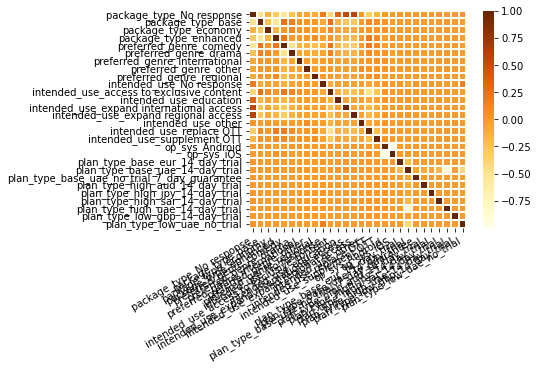

In [346]:
import seaborn as sns
%matplotlib inline

corr_check = df_churn_dummy[[ 'package_type_No response', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_No response', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'op_sys_Android', 'op_sys_iOS', 'plan_type_base_eur_14_day_trial',
       'plan_type_base_uae_14_day_trial',
       'plan_type_base_uae_no_trial_7_day_guarantee',
       'plan_type_high_aud_14_day_trial', 'plan_type_high_jpy_14_day_trial',
       'plan_type_high_sar_14_day_trial', 'plan_type_high_uae_14_day_trial',
       'plan_type_low_gbp_14_day_trial', 'plan_type_low_uae_no_trial']].corr()

sns.heatmap(corr_check, linewidths=0.3,
        xticklabels=corr_check.columns,
        yticklabels=corr_check.columns,cmap = "YlOrBr",square=True)
plt.xticks(rotation=30, horizontalalignment='right')
plt.savefig('corr')

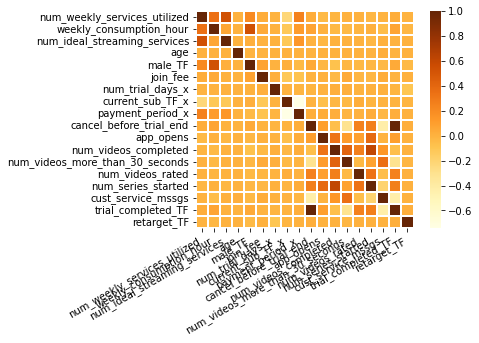

In [347]:
corr_check = df_churn_dummy[['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'join_fee',
       'num_trial_days_x', 'current_sub_TF_x', 'payment_period_x',
       'cancel_before_trial_end', 'app_opens', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'cust_service_mssgs', 'trial_completed_TF',
       'retarget_TF']].corr()

sns.heatmap(corr_check, linewidths=0.3,
        xticklabels=corr_check.columns,
        yticklabels=corr_check.columns,cmap = "YlOrBr",square=True)
plt.xticks(rotation=30, horizontalalignment='right')
plt.savefig('corr')

In [348]:
#from the heatmap, we can see "cancel_before_trial_end" and "trial_completed_TF" is highly correlated, so we delete 'cancel_before_trial_end'
#Also, "num_weekly_services_utilized" is high correlated with "num_ideal_streaming_services", drop "num_ideal_streaming_services" 
del df_churn_dummy['num_ideal_streaming_services']


In [349]:
del df_churn_dummy['cancel_before_trial_end']

In [350]:
del df_churn_dummy['subid']

In [351]:
del df_churn_dummy['preferred_genre_No response']

In [352]:
df_churn_dummy=df_churn_dummy.rename(columns={"current_sub_TF_x":"churn_TF"})

In [353]:
df_churn_dummy.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour', 'age',
       'male_TF', 'join_fee', 'num_trial_days_x', 'churn_TF',
       'payment_period_x', 'app_opens', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'cust_service_mssgs', 'trial_completed_TF',
       'retarget_TF', 'package_type_No response', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_No response',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'op_sys_Android', 'op_sys_iOS', 'plan_type_base_eur_14_day_trial',
       'plan_type

In [354]:
df_churn_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209859 entries, 0 to 209893
Data columns (total 44 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   num_weekly_services_utilized                 209859 non-null  float64
 1   weekly_consumption_hour                      209859 non-null  float64
 2   age                                          209859 non-null  float64
 3   male_TF                                      209859 non-null  int64  
 4   join_fee                                     209859 non-null  float64
 5   num_trial_days_x                             209859 non-null  float64
 6   churn_TF                                     209859 non-null  int64  
 7   payment_period_x                             209859 non-null  float64
 8   app_opens                                    209859 non-null  float64
 9   num_videos_completed                         209859 non-nul

In [355]:
import random
random.seed(666)
df_churn_train, df_churn_test = model_selection.train_test_split(df_churn_dummy, test_size=0.3)

In [380]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF'
x_col_name = [
      'num_weekly_services_utilized', 'weekly_consumption_hour', 'age',
       'male_TF', 'join_fee', 'num_trial_days_x',
       'payment_period_x','app_opens',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'cust_service_mssgs',
       'trial_completed_TF','package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional','plan_type_base_eur_14_day_trial',"retarget_TF"]  

add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_churn_train = sm.add_constant(df_churn_train)
    df_churn_test = sm.add_constant(df_churn_test)

In [381]:
df_churn_train[x_col_name]

,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,join_fee,num_trial_days_x,payment_period_x,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,cust_service_mssgs,trial_completed_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,plan_type_base_eur_14_day_trial,retarget_TF,const
49705,3.000000,18.601711,61.000000,0,0.036700,14.0,0.0,2.391304,2.934783,4.478261,0.130435,0.978261,0.500000,1,0,0,0,0,0,0,0,0,0,0,1.0
2222,3.000000,25.851492,37.000000,0,0.036700,14.0,1.0,1.000000,4.236842,4.289474,1.078947,0.986842,0.684211,1,0,0,1,0,0,0,0,1,0,0,1.0
136499,3.016208,43.250968,53.000000,1,0.000000,14.0,0.0,0.666667,0.666667,4.000000,0.000000,0.000000,0.666667,1,0,0,0,0,0,0,0,0,0,0,1.0
56485,2.000000,25.851492,47.000000,0,0.036700,14.0,0.0,0.986486,1.405405,4.243243,0.040541,0.959459,0.256757,1,0,0,0,0,0,0,0,0,0,0,1.0
87745,4.000000,25.851492,55.000000,0,0.036700,14.0,1.0,1.901639,0.229508,1.836066,0.000000,0.114754,0.163934,1,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20799,3.016208,28.118075,177.025977,0,0.110133,14.0,0.0,1.000000,1.476190,3.285714,0.000000,0.190476,0.095238,1,1,0,0,1,0,0,0,0,0,0,1.0
45047,3.016208,28.118075,177.025977,0,0.110133,14.0,2.0,1.184211,4.263158,4.289474,0.171053,1.000000,0.473684,1,1,0,0,1,0,0,0,0,0,0,1.0
82496,2.000000,22.951579,33.000000,0,0.036700,14.0,1.0,0.956522,2.913043,4.695652,0.000000,0.782609,0.347826,1,1,0,0,1,0,0,0,0,0,0,1.0
4000,3.016208,28.118075,177.025977,0,0.110133,14.0,1.0,2.750000,1.833333,4.250000,0.000000,0.708333,0.250000,1,0,0,1,1,0,0,0,0,0,0,1.0


In [382]:
#linear
churn_lpm = sm.OLS(endog=df_churn_train[y_col_name].astype(float), exog=df_churn_train[x_col_name].astype(float))
lpm_results = churn_lpm.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:38:18   Log-Likelihood:                -26716.
No. Observations:              146901   AIC:                         5.348e+04
Df Residuals:                  146876   BIC:                         5.373e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [383]:
#logistic regression
churn_logit = sm.Logit(endog=df_churn_train[y_col_name].astype(float), exog=df_churn_train[x_col_name].astype(np.float))
logit_results = churn_logit.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

C:\Users\Aileen\AppData\Local\Temp\ipykernel_1924\4233266916.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  churn_logit = sm.Logit(endog=df_churn_train[y_col_name].astype(float), exog=df_churn_train[x_col_name].astype(np.float))


Optimization terminated successfully.
         Current function value: 0.214367
         Iterations 8

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:               146901
Model:                          Logit   Df Residuals:                   146876
Method:                           MLE   Df Model:                           24
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.6880
Time:                        21:38:22   Log-Likelihood:                -31491.
converged:                       True   LL-Null:                   -1.0092e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num_weekly_services_utilized     

KeyError: ('prob_churn_lpm', 'prob_churn_logit')

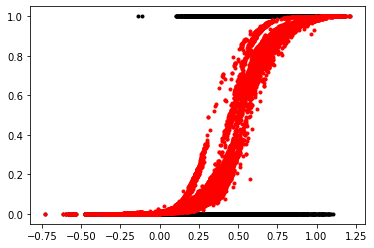

In [384]:
#EVALUATE MODEL PERFORMANCE: the result cannot print out due to version issue, but does not affect other results
# --- evaluate model predictions on test set graphically
df_churn_test['prob_churn_lpm'] = lpm_results.predict(df_churn_test[x_col_name])
df_churn_test['prob_churn_logit'] = logit_results.predict(df_churn_test[x_col_name].astype(float))

# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_churn_test['prob_churn_lpm'], df_churn_test['churn_TF'], 'k.')
ax.plot(df_churn_test['prob_churn_lpm'], df_churn_test['prob_churn_logit'], 'r.')
plt.ylim(df_churn_test['prob_churn_lpm', 'prob_churn_logit'].min().min()-.05, df_churn_test['prob_churn_lpm', 'prob_churn_logit'].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [385]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df_churn_dummy, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f_churn = copy.deepcopy(df_churn_dummy)

    # set offer parameters for all observations
    df_f_churn['price_no_offer'] = base_price
    df_f_churn.loc[df_f_churn['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f_churn.loc[df_f_churn['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f_churn.loc[df_f_churn['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f_churn['would_accept_offer_rand_draw'] = (df_f_churn['random_draws'] < df_f_churn['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f_churn['make_offer_lpm'] = (df_f_churn['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f_churn['accept_offer_lpm'] = (df_f_churn['make_offer_lpm'] & df_f_churn['would_accept_offer_rand_draw'])
    df_f_churn['price_lpm_offer'] = df_f_churn['price_no_offer']  # initialize prices from "do nothing case"
    df_f_churn.loc[df_f_churn['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f_churn['make_offer_logit'] = (df_f_churn['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f_churn['accept_offer_logit'] = (df_f_churn['make_offer_logit'] & df_f_churn['would_accept_offer_rand_draw'])
    df_f_churn['price_logit_offer'] = df_f_churn['price_no_offer']  # initialize prices from "do nothing case"
    df_f_churn.loc[df_f_churn['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f_churn['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f_churn['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f_churn, df_impact

In [386]:
def get_gini_info(actual, pred_prob):
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

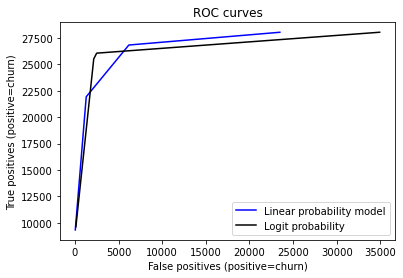

In [387]:
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_churn_test['churn_TF'], df_churn_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_churn_test['churn_TF'], df_churn_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'k-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])


In [429]:
#TEST RETENTION OFFER SCENARIOS
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.7343
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [430]:
df_churn_test['random_draws'] = np.random.random(df_churn_test.shape[0])
df_churn_test, df_impact = apply_offers(df_churn_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [431]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,34919,165317.0217,0.0
lpm_offer,42664,187637.82591,0.135018
logit_offer,42703,187813.94187,0.136084


In [432]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_churn_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

In [434]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_churn_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

In [435]:
df_lift_acceptance_rate_churn.to_csv("df_lift_acceptance_rate_churn.csv")

In [436]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_churn_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

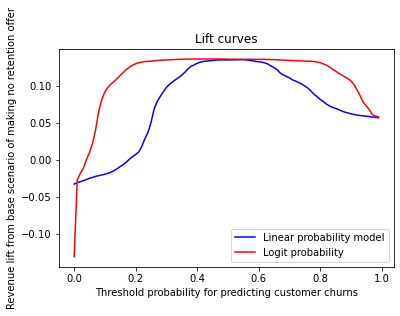

In [438]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

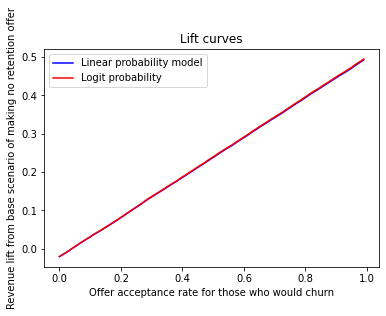

In [439]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

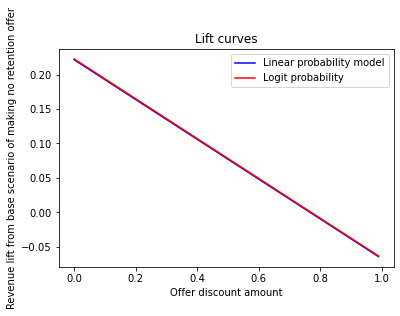

In [440]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])